# <span style="color:red">  Esercitazione_08</span>

In [3]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Informazioni utili:

- Le cartelle *<font color="blue">08.0, 08.2, 08.3</font>* contengono tutti i codici scritti per la realizzazione dell'esercitazione.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale. I codici sono strutturati in modo tale che una nuova compilazione vada automaticamente a sostituire i vecchi dati di output con quelli nuovi appena ottenuti.
- Di seguito sono riportati esclusivamente i risultati degli esercizi *08.2* e *08.3* poichè i codici per ottenerli comprendono le implementazioni richieste nei punti precedenti.

## Esercizio 08.2

Alcuni modelli quantistici non sono risolubili analiticamente ma solo numericamente. Con questo scopo è stato implementato un codice *Variational Monte Carlo* che sfrutta il principio variazionale per stimare le proprietà del ground-state (o di stati eccitati) di un sistema quantistico. Il sistema in esame è quello 1D di una particella confinata dal seguente potenziale:

$$
V(x) = x^4 - \frac{5}{2}x^2 
$$

Per ottenere una funzione d'onda appossimata del *ground-state* il principio variazionale prevede l'uso di una funziona di prova dipendendente da un set di parametri variazionali. Per il modello in esame la funzione d'onda di trial considerata è las seguente:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} 
$$

L'obiettivo è quello di ottenere i parametri tali da minimizzare il valore di aspettazione dell'hamiltoniana e quindi l'energia:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Il calcolo del seguente integrale può essere eseguito mediante la tecnica dell'importance sampling campionando attraverso l'algoritmo di Metropolis la distribuzione di probabilità $|\Psi_T(x)|^2$.
Si può notare che $\hat H= \hat T+ \hat V$ e di conseguenza:

$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{\left(\hat T+ \hat V\right)} \Psi_T(x)}{\Psi_T(x)} = \frac{{\hat T} \Psi_T(x)}{\Psi_T(x)}+\hat V \, ,
$$

dove l'ultimo passaggio è possibile poichè il potenziale è un osservabile diagonale.

Viene riportato di seguito la soluzione del problema attraverso la tecnica numerica che trasforma l'equazione di $Sch\ddot{o}rodinger$ in un'equazione matriciale. Questi risultati saranno utili per un successivo confronto tra le tecniche di calcolo numeriche.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331761027
2nd excited state energy:  1.971733134393021


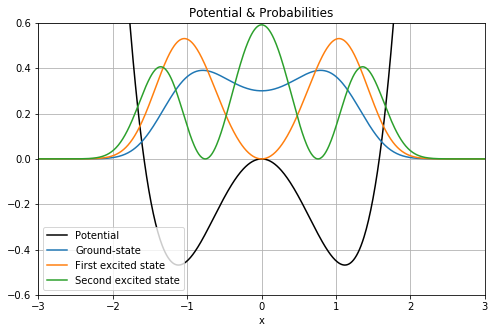

In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Analitic_psi(x,mu,sigma):  #è il modulo quadro della psi di trial normalizzata
    normalization = 2. * sigma * np.sqrt(np.pi) * ( 1. + np.exp(-mu**2/sigma**2) )
    return ((np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2)/normalization

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label = 'Ground-state')
plt.plot(x,(psi[1])**2, label = 'First excited state')
plt.plot(x,(psi[2])**2, label = 'Second excited state')
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

In modo tale da ottenere la miglior stima possibile dell'energia del *ground state* attraverso il metodo variazionale si è effettuata una media su $10^4$ stime dell'integrale $\langle {\hat H} \rangle_T$, ognuno dei quali con $10^3$ campionamenti del Metropolis. Questo processo è stato iterato per ogni valore dei parametri; osservando il grafico sopra riportato è stato possibile ricavare un'idea del range a cui possono appartenere i parametri: $\mu \in [0.7, 0.9]$ e $\sigma \in [0.3, 1]$. Successivamete questi intervalli sono stati ristretti maggiormente per ottenere i migliori parametri possibili. Di seguito si riportano i valori ottenuti.

In [5]:
mu, sigma, Energy = np.loadtxt("Results/08.0/optimization.parameter.out", usecols=(0,1,2), unpack='true')
_mu =  mu[np.argmin(Energy)]
_sigma = sigma[np.argmin(Energy)]
print('Miglior stima di mu = ', _mu)
print('Miglior stima di sigma = ', _sigma) 

Miglior stima di mu =  0.795
Miglior stima di sigma =  0.61


Di conseguenza si è così ottenuta la forma analitica per la funzione di trial con i valori dei parametri che minimizzano l'energia.
La simulazione, preceduta da una fase di equilibrazione, consiste nell'esecuzione di $10^4$ integrali $\langle {\hat H} \rangle_T$ ciascuno effettuato con $10^4$ campionamenti dell'algoritmo di Metropolis. La probabilità di transizione scelta per il Metropolis è una distribuzione uniforme con un passo tale per ottenere una probabilità di accettazione $\simeq 50\%$. Per l'analisi dei dati e la stima deglio errori è stato utilizato il metodo del *data blocking*.

Inoltre è stato possibile ottenere "un'immagine" della distribuzione campionata $|\Psi_T(x)|^2$ riempiendo durante la simulazione un istogramma con i punti appena campionati.

Di seguito è riportato il grafico dei valori medi dell'energia con i rispettivi errori in funzione del numero di blocchi istanziati e l'istogramma della distribuzione di probabilità campionata in confronto alla curva analitica e quella ottenuta risolvendo l'equazione di $Sch\ddot{o}rodinger$ in forma matriciale.

Energia di Ground state per metodo matriciale:  -0.46046587969271563
Energia di Ground state per metodo variazionale:  -0.444037912693  +/- 8.6339095806e-05


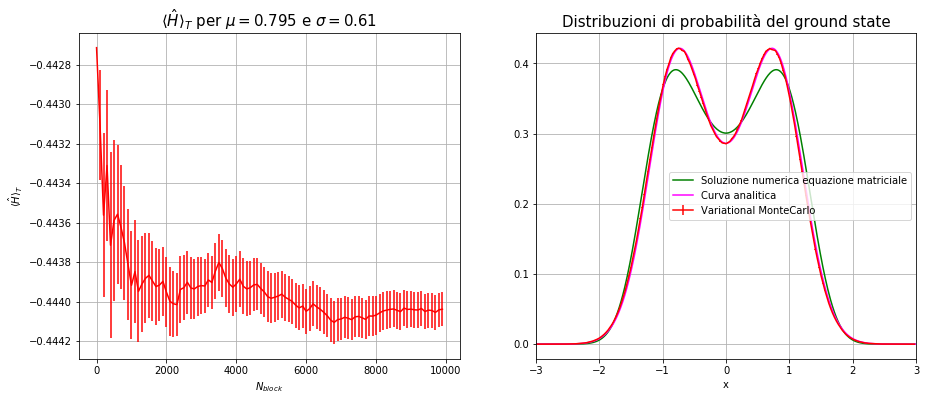

In [6]:
print("Energia di Ground state per metodo matriciale: ", E[0])
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
N_block, integral, err= np.loadtxt('Results/08.2/hamiltonian_results.out', usecols=(0,1,2),unpack='true')
plt.errorbar(N_block,integral, err, color = 'red')
print("Energia di Ground state per metodo variazionale: ",  integral[len(integral)-1], " +/-", err[len(integral)-1])
plt.ylabel('$I$')
plt.grid(True)
plt.ylabel(r'$\langle {\hat H} \rangle_T$')
plt.xlabel('$N_{block}$')
plt.title(r'$\langle {\hat H} \rangle_T$ per $\mu = 0.795$ e $\sigma = 0.61$ ', fontsize = 15)

plt.subplot(1,2,2)
scale = 0.3
_mu = mu[np.argmin(Energy)]
_sigma = sigma[np.argmin(Energy)]
r, psi2, err_psi2= np.loadtxt('Results/08.2/configurations.out', usecols=(0,1,2),unpack='true')
plt.errorbar(r,psi2, err_psi2,label='Variational MonteCarlo', color = 'red')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale', color = 'green')
plt.plot(x,Analitic_psi(x,_mu,_sigma), label = 'Curva analitica', color = 'magenta')
plt.title("Distribuzioni di probabilità del ground state", fontsize = 15)
plt.xlabel("x")
plt.grid(True)
plt.xlim(-3,3)
plt.ylim()
plt.legend()
plt.show()

Il metodo variazionale fornisce un limite superiore alla all'energia corretta di ground state ed è per questo motivo che l'energia ottenuta con questo metodo è maggiore di quella ottenuta con la risoluzione dell'equazione matriciale.

## Esercizio 08.3

Utilizzando l'algoritmo $PIGS$ è stato possibile ottenere un ulteriore risultato da confrontare con quello ottenuto dal metodo variazionale. In questo caso le funzioni di trial sono state due:
- $\Psi_T=1 $ 
- $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ (quella utilizzata precedentemente)

Di seguito sono riportati gli istogrammi dei campionamenti delle funzioni d'onda di ground-state attraverso Variation MontCarlo e PIGS a confronto con la soluzione matriciale per entrambe le funzioni di trial utilizzate.

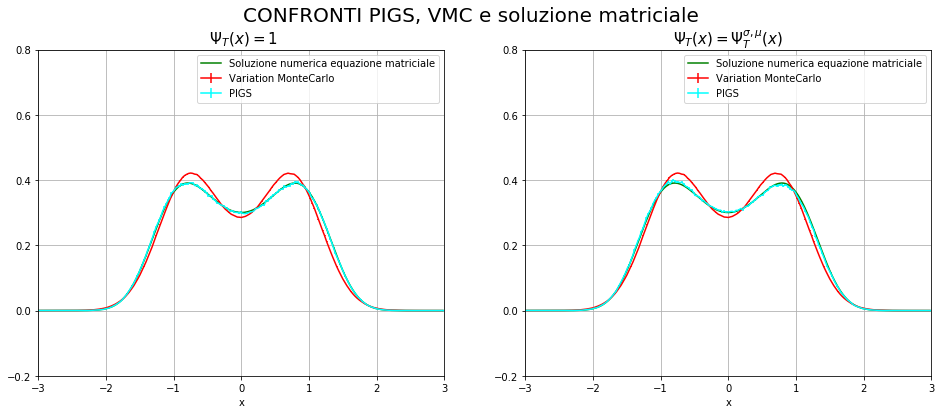

In [7]:
x_pigs1, pigs1, err_pigs1= np.loadtxt('Results/08.3/PIGS/probability_pigs_psi1.dat', usecols=(0,1,2),unpack='true')
x_pigsT, pigsT, err_pigsT= np.loadtxt('Results/08.3/PIGS/probability_pigs_psiT.dat', usecols=(0,1,2),unpack='true')

plt.figure(figsize=(16,6))
plt.suptitle('CONFRONTI PIGS, VMC e soluzione matriciale',fontsize=20)

plt.subplot(1,2,1)
plt.errorbar(r,psi2, err_psi2,label='Variation MonteCarlo', color = 'red')
plt.errorbar(x_pigs1, pigs1, err_pigs1,label = 'PIGS', color = 'cyan')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale', color = 'green')
plt.title(r" $\Psi_T(x)=1$", fontsize = 15)
plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(r,psi2, err_psi2,label='Variation MonteCarlo', color = 'red')
plt.errorbar(x_pigsT, pigsT, err_pigsT,label = 'PIGS', color = 'cyan')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale', color = 'green')
plt.title(r"$\Psi_T(x)= \Psi_T^{\sigma,\mu}(x)$", fontsize = 15)
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.xlabel("x")
plt.grid(True)

plt.show()

Si può notare che i risultati ottenuti attraverso l'algoritmo $PIGS$ sono compatibili con quelli della soluzione matriciale e quindi migliori rispetto a quelli ottenuto con il metodo variazionale. Questo comportamento si ottiene poichè nell'algoritmo $PIGS$ nel limite di tempi di evoluzione immaginari grandi, la funzione d'onda diventa proporzionale al ground-state. Nei grafici si è considerato $\tau = 8$. Di coseguenza è stato studiato di quanto fosse possibile ridutte il tempo di propagazione per le due funzioni di trail utilizzate. Di seguito sono riportati tutti i grafici ottenuti per valori dversi di $\tau$.

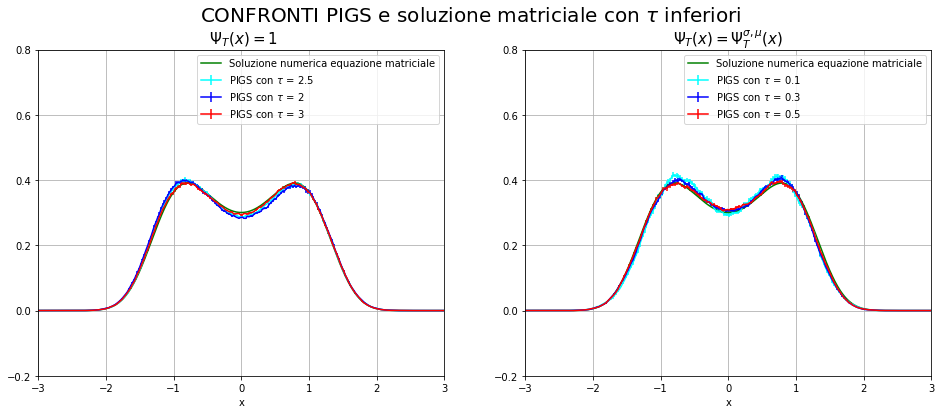

In [8]:
x_pigs1, pigs1, err_pigs1= np.loadtxt('Results/08.3/PIGS/probability_pigs_psi1.tau2.5.dat', usecols=(0,1,2),unpack='true')
x_pigs1_tau1, pigs1_tau1, err_pigs1_tau1= np.loadtxt('Results/08.3/PIGS/probability_pigs_psi1.tau2.dat', usecols=(0,1,2),unpack='true')
x_pigs1_tau2, pigs1_tau2, err_pigs1_tau2= np.loadtxt('Results/08.3/PIGS/probability_pigs_psi1.tau3.dat', usecols=(0,1,2),unpack='true')
x_pigsT, pigsT, err_pigsT= np.loadtxt('Results/08.3/PIGS/probability_pigs_psiT.tau0.1.dat', usecols=(0,1,2),unpack='true')
x_pigsT_tau1, pigsT_tau1, err_pigsT_tau1= np.loadtxt('Results/08.3/PIGS/probability_pigs_psiT.tau0.3.dat', usecols=(0,1,2),unpack='true')
x_pigsT_tau2, pigsT_tau2, err_pigsT_tau2= np.loadtxt('Results/08.3/PIGS/probability_pigs_psiT.tau0.5.dat', usecols=(0,1,2),unpack='true')

plt.figure(figsize=(16,6))
plt.suptitle(r'CONFRONTI PIGS e soluzione matriciale con $\tau$ inferiori',fontsize=20)

plt.subplot(1,2,1)
plt.errorbar(x_pigs1, pigs1, err_pigs1,label = r'PIGS con $\tau$ = 2.5', color = 'cyan')
plt.errorbar(x_pigs1_tau1, pigs1_tau1, err_pigs1_tau1,label = r'PIGS con $\tau$ = 2', color = 'blue')
plt.errorbar(x_pigs1_tau2, pigs1_tau2, err_pigs1_tau2,label = r'PIGS con $\tau$ = 3', color = 'red')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale', color = 'green')
plt.title(r" $\Psi_T(x)=1$", fontsize = 15)
plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(x_pigsT, pigsT, err_pigsT,label = r'PIGS con $\tau$ = 0.1', color = 'cyan')
plt.errorbar(x_pigsT_tau1, pigsT_tau1, err_pigsT_tau1,label = r'PIGS con $\tau$ = 0.3', color = 'blue')
plt.errorbar(x_pigsT_tau2, pigsT_tau2, err_pigsT_tau2,label = r'PIGS con $\tau$ = 0.5', color = 'red')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale', color = 'green')
plt.title(r"$\Psi_T(x)= \Psi_T^{\sigma,\mu}(x)$", fontsize = 15)
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.xlabel("x")
plt.grid(True)

plt.show()

Come si può osservare dai grafici soprastanti nel caso di $\Psi_T=1 $ l'approssimazione di ground-state è da considerarsi accettabile fino a $\tau \in [2,3]$ mentre per $\Psi_T= \Psi_T^{\sigma,\mu}(x)$ è possibile ottenere un'ottima approssimazione fino a volori di $\tau$ compresi in $[0.3,0.5]$. Queste deduzioni euristiche confermano che considerando una funzione d'onda il più simile possibile a quella del GS del sistema, il *PIGS* richiede poche proiezioni tra *bra* e *ket* per convergere al risultato corretto.

In conclusione utilizzando l'algoritmo $PIMC$ è possibile ottenere la variazione della funzione d'onda nella situazione in cui la temperatura è diversa da zero ($T>0 K$) e quindi non solo il ground state può essere occupato. Di seguito è riportato l' istogramma ottenuto per temperature diverse in confronto a quella del ground state ottenuta dal metodo matriciale.

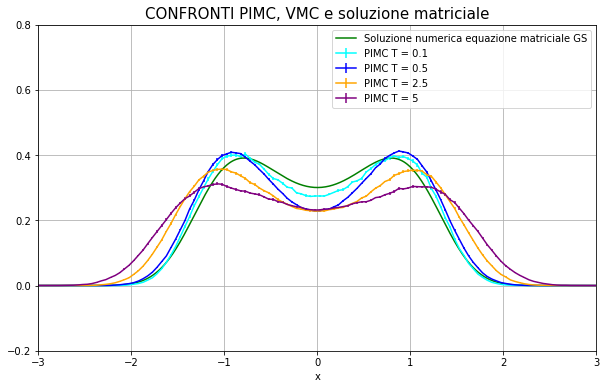

In [16]:
x_pimcT, pimcT, err_pimcT= np.loadtxt('Results/08.3/PIMC/probability_pimc_psiT.0.5.dat', usecols=(0,1,2),unpack='true')
x_pimcT2, pimcT2, err_pimcT2= np.loadtxt('Results/08.3/PIMC/probability_pimc_psiT.2.5.dat', usecols=(0,1,2),unpack='true')
x_pimcT3, pimcT3, err_pimcT3= np.loadtxt('Results/08.3/PIMC/probability_pimc_psiT.5.dat', usecols=(0,1,2),unpack='true')
x_pimcT4, pimcT4, err_pimcT4= np.loadtxt('Results/08.3/PIMC/probability_pimc_psiT.0.1.dat', usecols=(0,1,2),unpack='true')

plt.figure(figsize=(10,6))
plt.errorbar(x_pimcT4, pimcT4, err_pimcT4,label = 'PIMC T = 0.1', color = 'cyan')
plt.errorbar(x_pimcT, pimcT, err_pimcT,label = 'PIMC T = 0.5',color = 'blue')
plt.errorbar(x_pimcT2, pimcT2, err_pimcT2,label = 'PIMC T = 2.5', color = 'orange')
plt.errorbar(x_pimcT3, pimcT3, err_pimcT3,label = 'PIMC T = 5', color = 'purple')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale GS', color = 'green') 
plt.title('CONFRONTI PIMC, VMC e soluzione matriciale',fontsize=15)
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.xlabel("x")
plt.grid(True)

plt.show()